In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
# Load the dataset
file_path = 'yelp_review_cleaned_dataset.csv'
yelp_data = pd.read_csv(file_path)

# Display basic information about the dataset
yelp_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     10000 non-null  object
 1   user_id       10000 non-null  object
 2   business_id   10000 non-null  object
 3   stars         10000 non-null  int64 
 4   useful        10000 non-null  int64 
 5   funny         10000 non-null  int64 
 6   cool          10000 non-null  int64 
 7   text          10000 non-null  object
 8   date          10000 non-null  object
 9   cleaned_text  10000 non-null  object
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [3]:
# Summary statistics for numerical columns
summary_stats = yelp_data.describe()
print(summary_stats)


             stars        useful         funny          cool
count  10000.00000  10000.000000  10000.000000  10000.000000
mean       3.83810      0.899100      0.261000      0.350400
std        1.35885      1.979877      1.053656      1.167885
min        1.00000      0.000000      0.000000      0.000000
25%        3.00000      0.000000      0.000000      0.000000
50%        4.00000      0.000000      0.000000      0.000000
75%        5.00000      1.000000      0.000000      0.000000
max        5.00000     70.000000     30.000000     42.000000


/var/folders/_k/bb383shx761csjrzlzgk50rh0000gn/T/ipykernel_23891/1847554252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yelp_data, x='stars', palette='viridis')


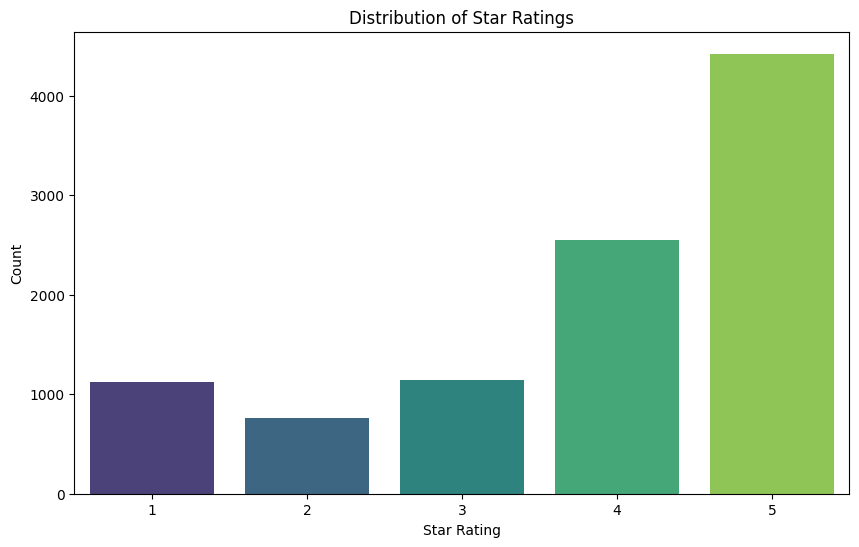

In [4]:
# Distribution of star ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=yelp_data, x='stars', palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


/var/folders/_k/bb383shx761csjrzlzgk50rh0000gn/T/ipykernel_18559/3559217672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=yelp_data, x='stars', y='useful', ax=axs[0], palette='viridis')
/var/folders/_k/bb383shx761csjrzlzgk50rh0000gn/T/ipykernel_18559/3559217672.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=yelp_data, x='stars', y='funny', ax=axs[1], palette='viridis')
/var/folders/_k/bb383shx761csjrzlzgk50rh0000gn/T/ipykernel_18559/3559217672.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=yelp_data, x='stars

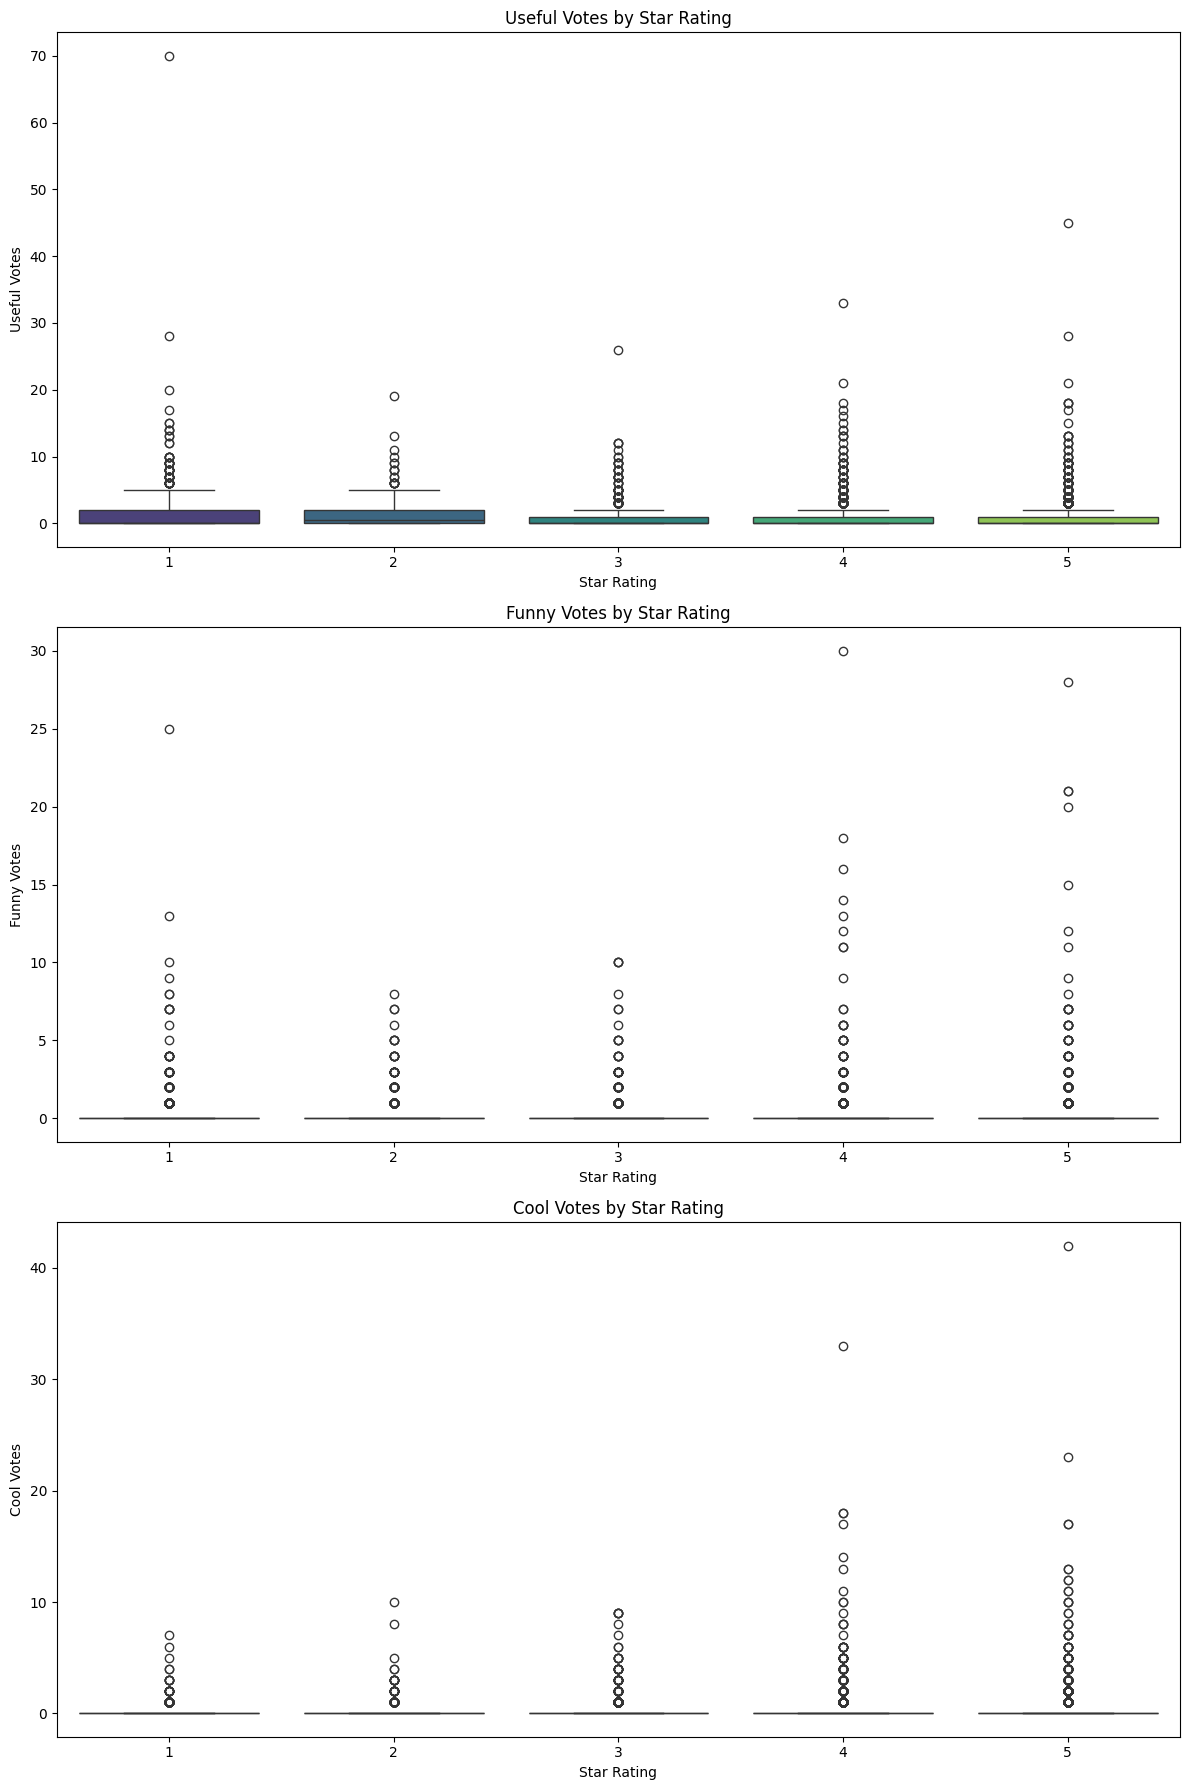

In [5]:
# Relationship between star ratings and number of useful, funny, and cool votes

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.boxplot(data=yelp_data, x='stars', y='useful', ax=axs[0], palette='viridis')
axs[0].set_title('Useful Votes by Star Rating')
axs[0].set_xlabel('Star Rating')
axs[0].set_ylabel('Useful Votes')

sns.boxplot(data=yelp_data, x='stars', y='funny', ax=axs[1], palette='viridis')
axs[1].set_title('Funny Votes by Star Rating')
axs[1].set_xlabel('Star Rating')
axs[1].set_ylabel('Funny Votes')

sns.boxplot(data=yelp_data, x='stars', y='cool', ax=axs[2], palette='viridis')
axs[2].set_title('Cool Votes by Star Rating')
axs[2].set_xlabel('Star Rating')
axs[2].set_ylabel('Cool Votes')

plt.tight_layout()
plt.show()


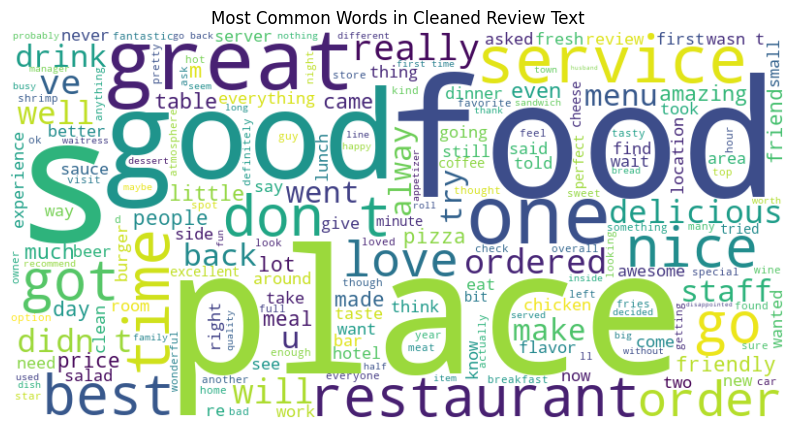

In [5]:

# Combine all the cleaned text into one large string
all_cleaned_text = " ".join(review for review in yelp_data.cleaned_text)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Cleaned Review Text')
plt.show()
